In [44]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Importing Data
from sklearn.datasets import fetch_california_housing # Changed to fetch_california_housing
housing = fetch_california_housing() # Changed variable name to housing

# Access the data and target
data = housing.data
target = housing.target

# Optionally convert to a pandas DataFrame for easier handling or more understable
df = pd.DataFrame(data, columns=housing.feature_names)
df['target'] = target
df['MedHouseVal'] = target


In [45]:
housing.data.shape

(20640, 8)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   target       20640 non-null  float64
 9   MedHouseVal  20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [47]:

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


In [48]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [49]:


housing.target.shape

(20640,)

In [50]:






df['price']=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422,3.422


In [51]:
#input data
x = df[housing.feature_names]

#output data
y=housing.target

#applying train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("xtrain shape:",x_train.shape)
print("xtest shape:",x_test.shape)
print("ytrain shape:",y_train.shape)
print("y_test shape:",y_test.shape)


xtrain shape: (16512, 8)
xtest shape: (4128, 8)
ytrain shape: (16512,)
y_test shape: (4128,)


In [52]:
#applying linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
# test results predict
y_pred= reg.predict(x_test)

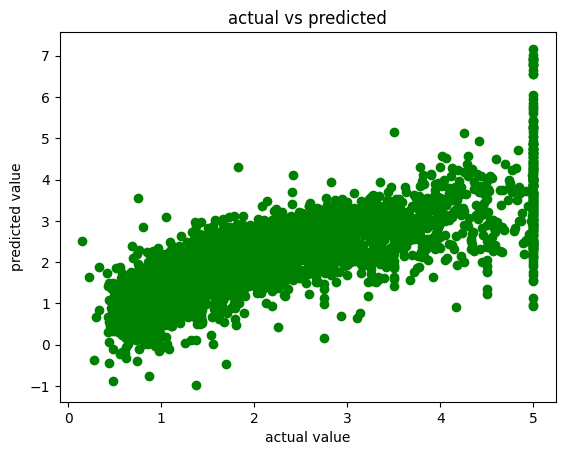

In [53]:
#plotting the graph
#scatter plot for numerical to numerical value
plt.scatter(y_test,y_pred,c='green')
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("actual vs predicted")
plt.show()

In [54]:
#we show in this data maximum price lie between the centre or may bhi rate of house smae in mostly cases
#calculate mean squared error and mean absolute error
#mse deal with outlayers case
#mae deal with larger errors
from sklearn.metrics import mean_squared_error,mean_absolute_error
#
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean squared error:",mse)
print("mean absolute error:",mae)

mean squared error: 0.5289841670367209
mean absolute error: 0.535126133655451


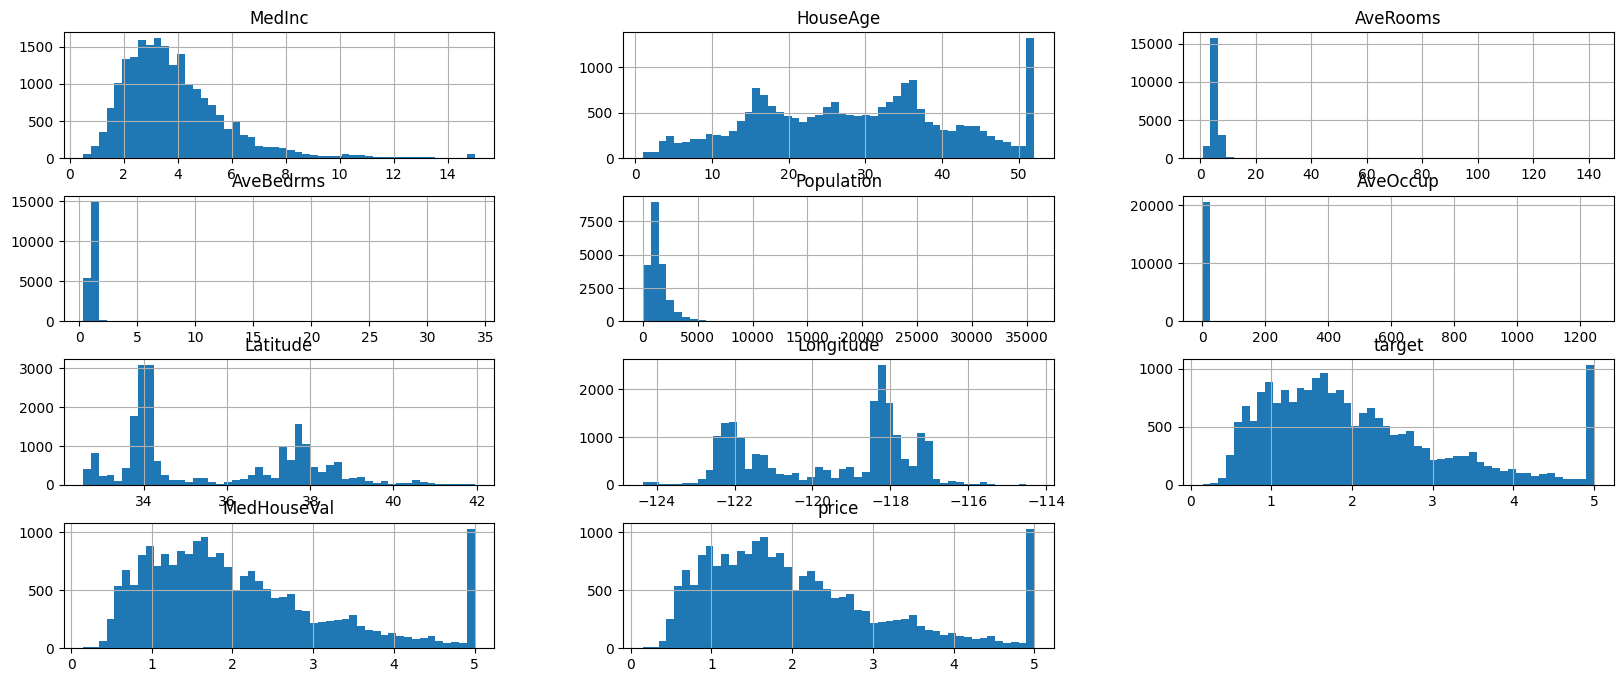

In [57]:
df.hist(bins=50,figsize=(20,8))
plt.show()

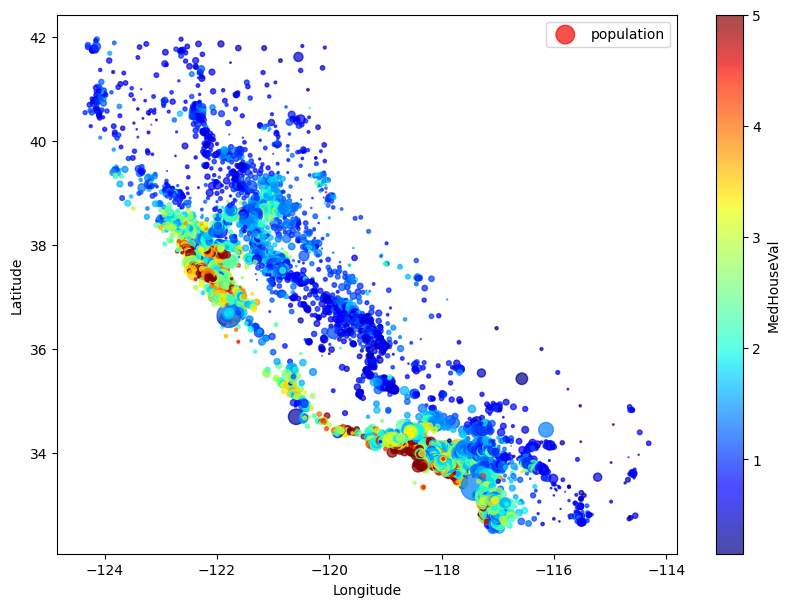

In [59]:
df.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['Population']/100, label="population", alpha=0.7)
plt.show()

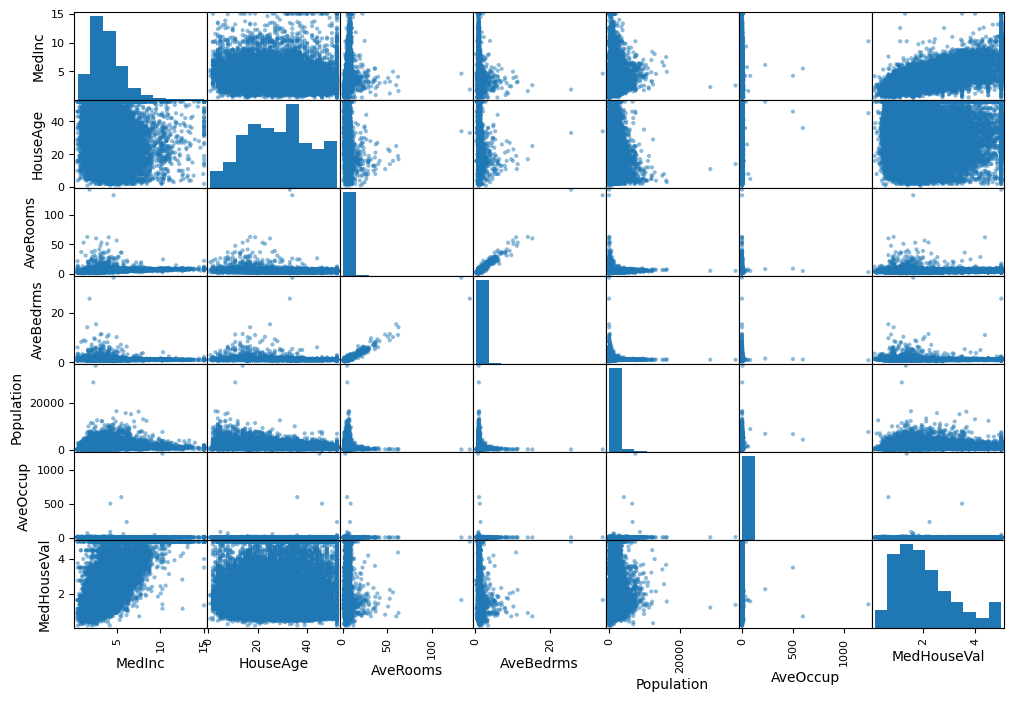

In [61]:
#selecting columns with the help of attributes
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(df[attributes], figsize=(12,8))
plt.show()

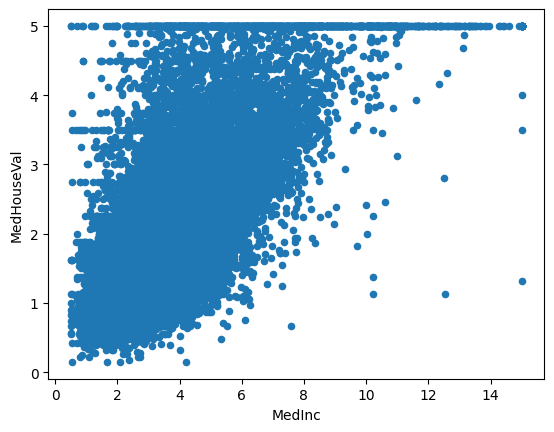

In [62]:
df.plot(kind="scatter", x="MedInc",y="MedHouseVal")
plt.show()


In [64]:
corr=df.corr()
corr['MedHouseVal'].sort_values(ascending=True)


,MedHouseVal
Latitude,-0.144160
AveBedrms,-0.046701
Longitude,-0.045967
Population,-0.024650
AveOccup,-0.023737
HouseAge,0.105623
AveRooms,0.151948
MedInc,0.688075
target,1.000000
MedHouseVal,1.000000


In [66]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0
MedHouseVal,0


In [67]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64
MedHouseVal,float64


In [70]:
#split the dataset for testing and training
x= df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [71]:
#fitting the model
regression_pipeline=Pipeline([('scaler',StandardScaler()),('regressor',LinearRegression())])
regression_pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [72]:
y_pred=regression_pipeline.predict(x_test)
r2_score(y_test,y_pred)

1.0